<font color = green>

# Linear Regression one variable (manual implementation)

</font>

<font color = green >

### Import necessary packages
</font>

In [562]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [563]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

<font color = green >

### Set interactive backend 
</font>

In [564]:
%matplotlib inline

<font color = green >

### Load data set 
</font>

In [565]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

<font color = green >

### Select one feature
</font>

In [566]:
df = df[['RM']] # Note: returns df comparing to  df['RM']
df['target'] = y

<font color = green >

### Review the data 
</font>

In [567]:
print(df.head(10))
df.describe()

      RM  target
0  6.575    24.0
1  6.421    21.6
2  7.185    34.7
3  6.998    33.4
4  7.147    36.2
5  6.430    28.7
6  6.012    22.9
7  6.172    27.1
8  5.631    16.5
9  6.004    18.9


,RM,target
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


<Axes: xlabel='RM', ylabel='target'>

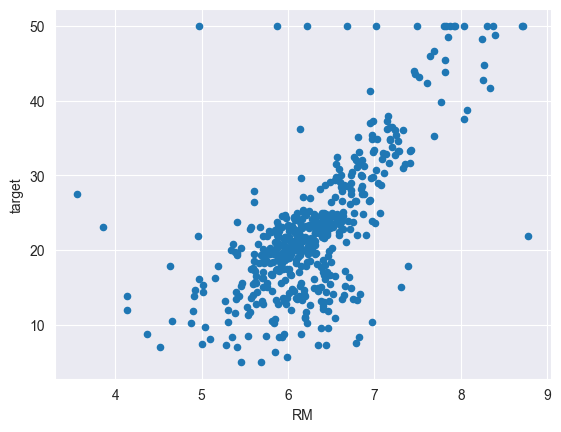

In [568]:
df.plot.scatter('RM', 'target')

<font color = green >

## Custom Linear Regression Classifier
</font>

<font color = green >

### Load all data 
</font>

In [569]:
X, y = load_boston(return_X_y=True)

# YOUR_CODE. select the values of feature 5 only (corresponding to 'RM') and assign to X 
# START_CODE 
X = X[:, 5]
# END_CODE 

X = X.reshape(-1,1) # make it 2d as for case of mutivariable

# YOUR_CODE. Apply train_test_split to X and Y to get X_train, X_test, y_train, y_test
# START_CODE 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# END_CODE 

<font color = blue >

### Check loaded data

</font>

In [570]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
print ('X_train.shape = ',X_train.shape)
print ('y_train.shape = ',y_train.shape)
X_train[:10]

X_train.shape =  (379, 1)
y_train.shape =  (379,)


array([[6.12 ],
       [5.572],
       [6.727],
       [5.786],
       [6.382],
       [6.211],
       [5.036],
       [6.619],
       [7.236],
       [5.403]])

<font color = blue>
Expected output:
</font>

<br>`X_train.shape=  (379, 1)`
<br>`y_train.shape=  (379,)`

<font color = green >

### Develop expresion of h

</font>

In [571]:
class Linear_Regression_1():
    def __init__(self):
        pass
            
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Assign expression for h to h_res 
        # START_CODE 
        h_res = np.dot(X, w.T) + b
        # END_CODE 
        
        return h_res

<font color = blue >

### Check h

</font>

In [572]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2018)
b_check = np.random.randn()
w_check = np.random.randn(1,1)
X_check = np.random.randn(10,1)
print('b = {}, \nw = {}, \nX = \n{}'.format(b_check, w_check, X_check))
lin_reg_1 = Linear_Regression_1()
lin_reg_1.h(b_check, w_check, X_check)

b = -0.276767596147759, 
w = [[0.581851]], 
X = 
[[ 2.14839926]
 [-1.279487  ]
 [ 0.50227689]
 [ 0.8560293 ]
 [-0.14279008]
 [ 0.11007867]
 [-0.68806479]
 [ 0.43356408]
 [ 0.510221  ]
 [-0.16513097]]


array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       [ 0.22131391],
       [-0.35985014],
       [-0.21271821],
       [-0.67711878],
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])

<font color = blue>
Expected output:
</font>


``` 
([[ 0.97328067],
[-1.02123839],
[ 0.01548272],
[ 0.22131391],
[-0.35985014],
[-0.21271821],
[-0.67711878],
[-0.0244979 ],
[ 0.02010501],
[-0.37284922]])
```

<font color = green >

### Develop expresion of Cost Function

</font>

In [573]:
class Linear_Regression_2():
    '''linear regression using gradient descent
    '''
    def __init__(self):
        pass


    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')    
   
        # YOUR_CODE. Assign expression for J to J_res 
        # START_CODE 
        m = h.shape[0]
        err = h - y
        J_res = (1/(2*m)) * np.sum(err**2)
        # END_CODE         
        return J_res           
 

<font color = blue >

### Check J

</font>

In [574]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2019)
m = 10 
y_check = np.random.randn(m,1)
h_check = np.random.randn(m,1)
print('y = {}, \nh = {}'.format(y_check, h_check))
lin_reg_2 = Linear_Regression_2()
lin_reg_2.m = m 
lin_reg_2.J(h_check, y_check)

y = [[-0.21767896]
 [ 0.82145535]
 [ 1.48127781]
 [ 1.33186404]
 [-0.36186537]
 [ 0.68560883]
 [ 0.57376143]
 [ 0.28772767]
 [-0.23563426]
 [ 0.95349024]], 
h = [[-1.6896253 ]
 [-0.34494271]
 [ 0.0169049 ]
 [-0.51498352]
 [ 0.24450929]
 [-0.18931261]
 [ 2.67217242]
 [ 0.46480249]
 [ 0.84593044]
 [-0.50354158]]


0.897146515186598

<font color = blue>
Expected output:
</font>

<br>`0.897146515186598`


<font color = green >

### Develop expresion of Cost Function  derivative 

</font>

In [575]:
class Linear_Regression_3():
    def __init__(self, max_iter = 1e5, alpha = 1,eps = 1e-10, verbose= 0):
        pass        

    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= np.dot(X, w.T) + b
        # END_CODE

        return h_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''    
        b, w = params
        assert (w.shape == (1, self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')

        # YOUR_CODE. Assign expressions for derivates of J by b and by w  to dJ_b and dJ_w corrrespondingly       
        # START_CODE  
        dJ_b = (1 / m) * np.sum(h_val - y)
        dJ_w = (1 / m) * np.dot((h_val - y).T, X)
        # END_CODE
        
        return (dJ_b, dJ_w)


<font color = blue >

### Check cost function derivatives 

</font>

In [576]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2020)
m = 10 
n = 1
X_check= np.random.randn(m, n)
y_check= np.random.randn(m, 1)
b_check= np.random.randn()
w_check= np.random.randn(1, n)
params = b_check,w_check 
print('X = {}, \ny = {}, \nb = {} \nw = {}'.format(X_check, y_check, b_check, w_check))

lin_reg_3 = Linear_Regression_3()
lin_reg_3.m = m 
lin_reg_3.n = n 
lin_reg_3.J_derivative(params, X_check, y_check)

X = [[-1.76884571]
 [ 0.07555227]
 [-1.1306297 ]
 [-0.65143017]
 [-0.89311563]
 [-1.27410098]
 [-0.06115443]
 [ 0.06451384]
 [ 0.41011295]
 [-0.57288249]], 
y = [[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]], 
b = 2.0899788404287745 
w = [[0.04197131]]


(2.1904608819958713, array([[-1.43284262]]))

<font color = blue>
Expected output:
</font>

`(2.1904608819958713, -1.4328426209410612)`


<font color = green >

### Develop gradient descent 

</font>

In [577]:
class Linear_Regression_4():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01,eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1] == w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res = np.dot(X, w.T) + b
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        J_res = (1 / (2 * self.m)) * np.sum((h - y)**2)
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b, w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        dJ_b = (1 / m) * np.sum(h_val - y)
        dJ_w = (1 / m) * np.dot((h_val - y).T, X)
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Develop one step of gradien descent 
            # START_CODE 
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b = b - self.alpha * dJ_b
            w = w - self.alpha * dJ_w
            params = (b, w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print ('b = {}, w = {}, J = {}'.format(b, w, self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
 

<font color = blue >

### Check gradient descent

</font>

In [578]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2021)
m = 10 
n = 1
X_check= np.random.randn(m, n)
y_check= np.random.randn(m, 1)
print('X = {}, \ny = {}'.format(X_check, y_check))
lin_reg_4 = Linear_Regression_4(alpha=1, max_iter=5, verbose=1)
lin_reg_4.fit(X_check, y_check)

X = [[ 1.48860905]
 [ 0.67601087]
 [-0.41845137]
 [-0.80652081]
 [ 0.55587583]
 [-0.70550429]
 [ 1.13085826]
 [ 0.64500184]
 [ 0.10641374]
 [ 0.42215483]], 
y = [[ 0.12420684]
 [-0.83795346]
 [ 0.4090157 ]
 [ 0.10275122]
 [-1.90772239]
 [ 1.1002243 ]
 [-1.40232506]
 [-0.22508127]
 [-1.33620597]
 [ 0.30372151]]
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w = [[-0.4217246]], J = 0.33976525493056825
b = -0.23643637277401236, w = [[-0.46886908]], J = 0.3278115023016167
b = -0.22184776004990137, w = [[-0.52721539]], J = 0.3250909705515032
b = -0.20379279582278398, w = [[-0.55396166]], J = 0.32428457786538833
b = -0.19551630227029396, w = [[-0.5697399]], J = 0.32403801171263197
b = -0.19063380881762437, w = [[-0.57831305]], J = 0.3239623872203208
b = -0.18798089094052142, w = [[-0.58309057]], J = 0.3239391853771439


True

<font color = blue>
Expected output:
</font>

```
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208
b = -0.18798089094052142, w= [[-0.58309057]], J= 0.3239391853771439
```


<font color = green >

### Alltogether 

</font>

Please copy the code of functions you developed above to the class corresponding functions.
    
Please review addtional already implemented functions: draw_cost_changes(), predict() and score()



In [579]:
from sklearn.metrics import r2_score
class Linear_Regression():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01, eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res = np.dot(X, w.T) + b
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        J_res = (1 / (2 * self.m)) * np.sum((h - y)**2)
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        m = self.m
        dJ_b = (1 / m) * np.sum(h_val - y)
        dJ_w = (1 / m) * np.dot((h_val - y).T, X)
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m, self.n = X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Insert one step of gradien descent developed in Linear_Regression_4 
            # START_CODE 
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b = b - self.alpha * dJ_b
            w = w - self.alpha * dJ_w
            params = (b, w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
        
    def draw_cost_changes(self):        
        J_hist= self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)

        return (r2_score(y_test, z))


<font color = blue >

### Check results

</font>

X_train.shape =  (379, 1)
y_train.shape =  (379,)
X_train = 
[[6.12 ]
 [5.572]
 [6.727]
 [5.786]
 [6.382]]
R2 Score = 0.6041147255336201
b: -30.74282121355404, w = [[8.48636964]]


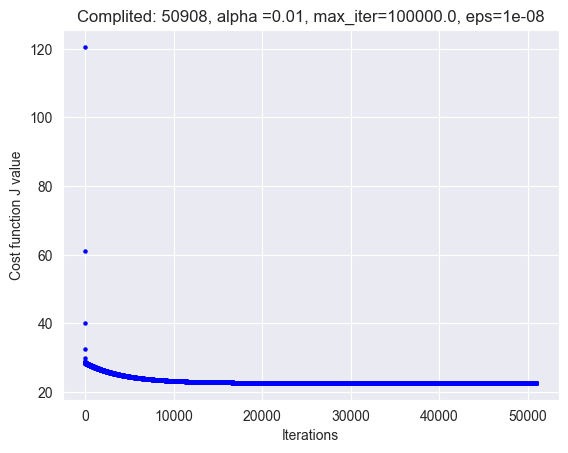

In [580]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_train = \n{}'.format (X_train[:5,:]))
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit(X_train, y_train)
lin_reg.draw_cost_changes()
print('R2 Score =', lin_reg.score(X_test, y_test))
print('b: {}, w = {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = blue>
Expected output:
</font>

```
R2 Score = 0.5725111120596516
b: -32.426140228921874, w= [[8.70481894]]
```


<font color = green >

### Draw scatter and prediction for one feature
</font>

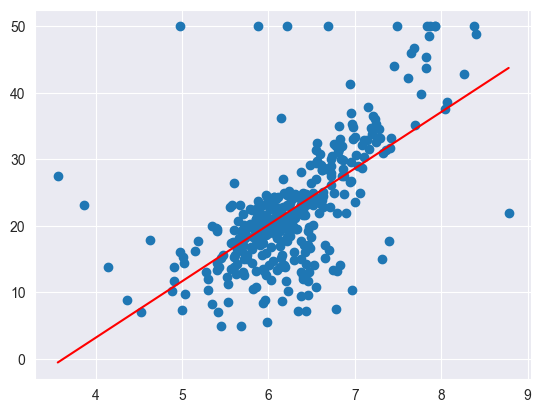

In [581]:
if X_train.shape[1] > 1:
    raise Exception ('Select single feature to plot')
plt.figure()
plt.scatter(X_train, y_train)
x_line= np.array([np.min(X_train), np.max(X_train)])
z_line = lin_reg.predict(x_line.reshape(-1,1))
plt.plot(x_line, z_line, '-', c='red')

<font color = green >

### Using normalization
</font>

In [582]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

R2 Score = 0.6044351157362065
b: 22.34364558156911, w= [[5.83493601]]


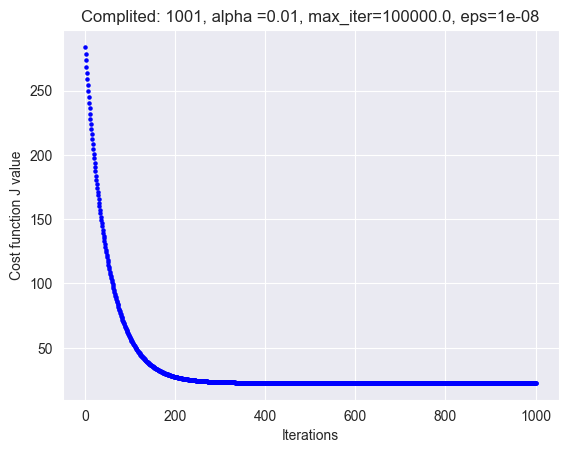

In [583]:
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train_scaled, y_train)
print ('R2 Score =',lin_reg.score(X_test_scaled, y_test))
lin_reg.draw_cost_changes()
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_))

#### Note: How faster it converges 

<font color = green >

## Run Linear Regression for multi features 
    
</font>

In [584]:
np.random.seed(2021)
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

# X= X[:,5].reshape(-1,1) # 5 corresponds to 'RM' 
# X= X[:,:5]

X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state=2018)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:5]

X_train.shape=  (379, 13)
y_train.shape=  (379,)


array([[1.17470e-01, 1.25000e+01, 7.87000e+00, 0.00000e+00, 5.24000e-01,
        6.00900e+00, 8.29000e+01, 6.22670e+00, 5.00000e+00, 3.11000e+02,
        1.52000e+01, 3.96900e+02, 1.32700e+01],
       [1.20482e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
        5.64800e+00, 8.76000e+01, 1.95120e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 2.91550e+02, 1.41000e+01],
       [1.28160e-01, 1.25000e+01, 6.07000e+00, 0.00000e+00, 4.09000e-01,
        5.88500e+00, 3.30000e+01, 6.49800e+00, 4.00000e+00, 3.45000e+02,
        1.89000e+01, 3.96900e+02, 8.79000e+00],
       [5.78340e-01, 2.00000e+01, 3.97000e+00, 0.00000e+00, 5.75000e-01,
        8.29700e+00, 6.70000e+01, 2.42160e+00, 5.00000e+00, 2.64000e+02,
        1.30000e+01, 3.84540e+02, 7.44000e+00],
       [8.71675e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.47100e+00, 9.88000e+01, 1.72570e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91980e+02, 1.71200e+01]])

In [585]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

R2 training Score = 0.7283111795119549
R2 Score = 0.7714399743645595
b: 22.199472295514532, w= [[-6.71888107e-01  1.10023856e+00  4.11947599e-03  8.26282274e-01
  -2.22625058e+00  2.43471682e+00  2.54149326e-01 -3.29472715e+00
   2.45132782e+00 -1.99309805e+00 -1.95019870e+00  7.67364288e-01
  -4.20581658e+00]]


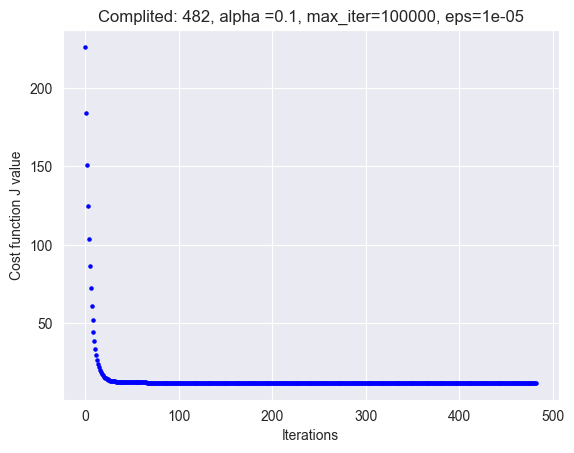

In [586]:
lin_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000)
lin_reg.fit (X_train_scaled, y_train)
lin_reg.draw_cost_changes()
print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = blue>
Expected output:
</font>

```
R2 training Score = 0.7283111795119549
R2 Score = 0.7714399743645595
b: 22.199472295514532, w= [[-6.71888107e-01  1.10023856e+00  4.11947599e-03  8.26282274e-01
  -2.22625058e+00  2.43471682e+00  2.54149326e-01 -3.29472715e+00
   2.45132782e+00 -1.99309805e+00 -1.95019870e+00  7.67364288e-01
  -4.20581658e+00]]
```


<font color = green >

### Compare with sklearn
</font>

In [587]:
from sklearn.linear_model import LinearRegression
lin_reg_sklearn = LinearRegression().fit(X_train_scaled, y_train)
lin_reg_sklearn.score(X_test_scaled, y_test)

0.7716066981275933